Maximize $x+y+z$  subject to $x^4+2y^4+3z^4-z-1 = 0$.

1. First solve this over the reals. Can you do it in radicals? How many (complex) critical points are there?
2. Next add a random linear constraint. Now, how many critical points?
3. Finally add two random linear constraints. How many critical points?

It appears this paper will result in the correct procedure for solving this problem: https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=ba7d41c28eb6252cefca62825013ad7d55975ec0

In [1]:
import matplotlib.pyplot as plt

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

import numpy as np
from matplotlib import cm

1. First solve this over the reals. Can you do it in radicals? How many (complex) critical points are there?

In [2]:
var("x, y, z, lambda_1")
f = x+y+z
P_1 = x^4 + 2*y^4 + 3*z^4 - z - 1
L = f - lambda_1 * P_1

In [3]:
L

-(x^4 + 2*y^4 + 3*z^4 - z - 1)*lambda_1 + x + y + z

In [4]:
dL_dx = L.diff(x)
dL_dy = L.diff(y)
dL_dz = L.diff(z)
dL_dlambda = L.diff(lambda_1)

In [5]:
dL_dx

-4*lambda_1*x^3 + 1

In [6]:
dL_dy

-8*lambda_1*y^3 + 1

In [7]:
dL_dz

-(12*z^3 - 1)*lambda_1 + 1

In [8]:
dL_dlambda

-x^4 - 2*y^4 - 3*z^4 + z + 1

In [9]:
S = solve([dL_dx == 0, dL_dy == 0, dL_dz == 0, dL_dlambda == 0], [x,y,z,lambda_1])

In [10]:
real_solution = 0
complex_solution = 0
for i in range(len(S)):
    if S[i][0].rhs().imag() == 0 and S[i][1].rhs().imag() == 0 and S[i][2].rhs().imag() == 0:
        real_solution += 1
        print("Real: (", S[i][0].rhs(), S[i][1].rhs(), S[i][2].rhs(), "), lambda = ", S[i][3].rhs())
    complex_solution += 1

Real: ( 0.875406283856988 0.694810379241517 0.6745643234775798 ), lambda =  0.3726585606309563
Real: ( -0.7462395543175487 -0.5922907114960095 -0.3807257584770969 ), lambda =  -0.6015964150679176


In [11]:
real_solution

2

In [12]:
complex_solution

36

In [13]:
R.<x,y,z,lambda_1> = PolynomialRing(QQ, order = 'lex')
I = R.ideal(dL_dx, dL_dy, dL_dz, dL_dlambda)
G = I.groebner_basis()

In [14]:
G[3]

lambda_1^36 - 54/265*lambda_1^34 + 24/265*lambda_1^33 - 1070673/37219250*lambda_1^32 - 1152/70225*lambda_1^31 + 9254584/4931550625*lambda_1^30 + 8150816/4931550625*lambda_1^29 + 658515702161/692636285281250*lambda_1^28 - 1158847808/2352349648125*lambda_1^27 - 54076873144927/275322923399296875*lambda_1^26 + 49946818240412/275322923399296875*lambda_1^25 - 4705037259844584091/116007313774293738281250*lambda_1^24 + 500865601084208/218881724102441015625*lambda_1^23 + 83596256110623518/19334552295715623046875*lambda_1^22 - 661281712375832/278417553058304971875*lambda_1^21 + 40139972763142043/696043882645762429687500*lambda_1^20 + 65270004402668464/174010970661440607421875*lambda_1^19 - 547999940342246749/3132197471905930933593750*lambda_1^18 + 23373856295122382/522032911984321822265625*lambda_1^17 - 66873490298228083/8352526591749149156250000*lambda_1^16 + 645803791454224/1566098735952965466796875*lambda_1^15 - 414657571875509/3132197471905930933593750*lambda_1^14 + 24285100797094/1044065823

In [15]:
def plot_this(z):
    return float(G[3].subs(lambda_1 = z))

In [16]:
plot_this(1)

0.8455578660239867

In [17]:
X = create_vector(-0.61,0.38,0.01)

Y = [plot_this(x) for x in X]

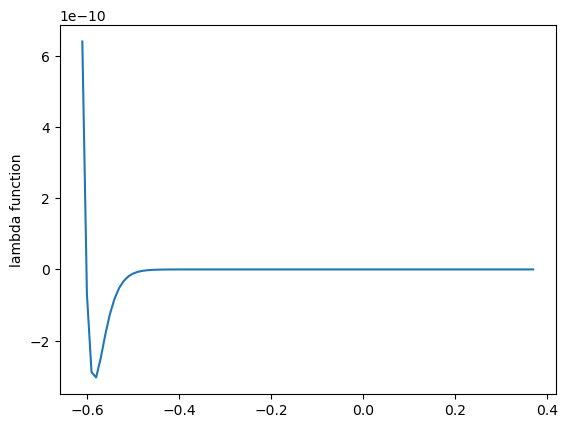

In [18]:
plt.plot(X,Y)
plt.ylabel('lambda function')
plt.show()

In [19]:
def plot_this_2(z):
    max_val = 0.01
    if abs(G[3].subs(lambda_1 = z)) < max_val:
        return G[3].subs(lambda_1 = z) / max_val
    else:
        return G[3].subs(lambda_1 = z) / abs(G[3].subs(lambda_1 = z))

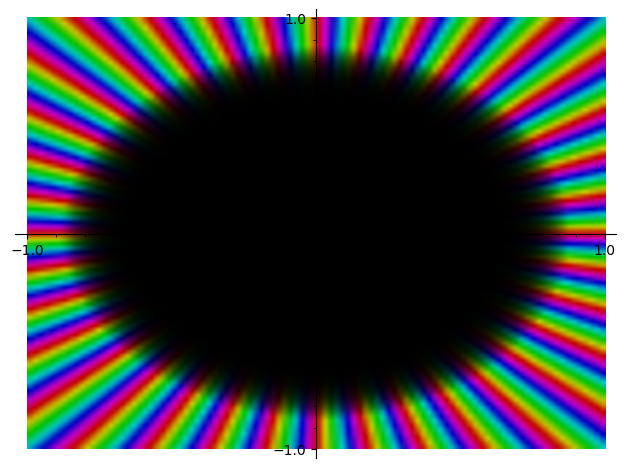

In [20]:
complex_plot(lambda z: plot_this_2(z), (-1, 1), (-1, 1))

2. Next add a random linear constraint. Now, how many critical points?

In [21]:
var("x, y, z, lambda_1, lambda_2")
f = x+y+z
P_1 = x^4 + 2*y^4 + 3*z^4 - z - 1
P_2 = 4 * x + 5 * y + 6 * z 
L = f + lambda_1 * P_1 + lambda_2 * P_2

In [22]:
L

(x^4 + 2*y^4 + 3*z^4 - z - 1)*lambda_1 + lambda_2*(4*x + 5*y + 6*z) + x + y + z

In [23]:
dL_dx = L.diff(x)
dL_dy = L.diff(y)
dL_dz = L.diff(z)
dL_dlambda_1 = L.diff(lambda_1)
dL_dlambda_2 = L.diff(lambda_2)

In [24]:
S = solve([dL_dx == 0, dL_dy == 0, dL_dz == 0, dL_dlambda_1 == 0, dL_dlambda_2 == 0], [x,y,z,lambda_1,lambda_2])

In [25]:
real_solution = 0
complex_solution = 0
for i in range(len(S)):
    if S[i][0].rhs().imag() == 0 and S[i][1].rhs().imag() == 0 and S[i][2].rhs().imag() == 0:
        real_solution += 1
        print("Real: (", S[i][0].rhs(), S[i][1].rhs(), S[i][2].rhs(), ")")
    complex_solution += 1

Real: ( 0.8059108954565505 -0.1019170753455194 -0.4523430028689831 )
Real: ( -0.9697910784867306 -0.09797745358090186 0.7281752824375214 )


In [26]:
real_solution

2

In [27]:
complex_solution

12

Let $V$ be a line. Then 
$$P(X,V) = $$

3. Finally add two random linear constraints. How many critical points?

In [28]:
var("x, y, z, lambda_1, lambda_2, lambda_3")
f = x+y+z
P_1 = x^4 + 2*y^4 + 3*z^4 - z - 1
P_2 = 4 * x + 5 * y + 6 * z 
P_3 = 9 * x + 13 * y

L = f - lambda_1 * P_1 - lambda_2 * P_2 - lambda_3 * P_3

In [29]:
L

-(x^4 + 2*y^4 + 3*z^4 - z - 1)*lambda_1 - lambda_3*(9*x + 13*y) - lambda_2*(4*x + 5*y + 6*z) + x + y + z

In [30]:
dL_dx = L.diff(x)
dL_dy = L.diff(y)
dL_dz = L.diff(z)
dL_dlambda_1 = L.diff(lambda_1)
dL_dlambda_2 = L.diff(lambda_2)
dL_dlambda_3 = L.diff(lambda_3)

In [31]:
S = solve([dL_dx == 0, dL_dy == 0, dL_dz == 0, dL_dlambda_1 == 0, dL_dlambda_2 == 0, dL_dlambda_3 == 0], [x,y,z,lambda_1,lambda_2,lambda_3])

In [32]:
S

[[x == 0.8910259579728059, y == -0.6168641329435298, z == -0.07996386785960083, lambda_1 == 0.05164690382081687, lambda_2 == 0.1753273046295047, lambda_3 == 0.01694985667400607], [x == (0.01857041306330888 + 0.9099754251460749*I), y == (-0.01285643981306008 - 0.6299829866395903*I), z == (-0.001666575531348328 - 0.08166446123113702*I), lambda_1 == (-0.002023694643896632 + 0.04951994291314279*I), lambda_2 == (0.1663833915816236 + 0.008252223495261035*I), lambda_3 == (0.02055827324741109 - 0.003329358312017009*I)], [x == (0.01857041306330888 - 0.9099754251460749*I), y == (-0.01285643981306 + 0.6299829866395905*I), z == (-0.001666575531347083 + 0.08166446123109727*I), lambda_1 == (-0.002023694643896632 - 0.04951994291314279*I), lambda_2 == (0.1663833915816235 - 0.008252223495261038*I), lambda_3 == (0.02055827324741112 + 0.003329358312017007*I)], [x == -0.9281668383110195, y == 0.642577030812325, z == 0.08329702251270879, lambda_1 == -0.04759951694123545, lambda_2 == 0.158788435061955, lamb

In [33]:
real_solution = 0
complex_solution = 0
for i in range(len(S)):
    if S[i][0].rhs().imag() == 0 and S[i][1].rhs().imag() == 0 and S[i][2].rhs().imag() == 0:
        real_solution += 1
        print("Real: (", S[i][0].rhs(), S[i][1].rhs(), S[i][2].rhs(), ")")
    complex_solution += 1

Real: ( 0.8910259579728059 -0.6168641329435298 -0.07996386785960083 )
Real: ( -0.9281668383110195 0.642577030812325 0.08329702251270879 )


In [34]:
real_solution

2

In [35]:
complex_solution

4

Let $V = \emptyset$. Then we see that 

$$P(X,V) = X \implies \delta_{dim(P(X,V))} = \delta_2 = deg(P(X,V)) = deg(X) = 4$$